In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#  Preprocessing the dataset


In [ ]:
def remove_pattern(input_txt,pattern):
  r=re.findall(pattern,input_txt)
  for word in r:
    input_txt = re.sub(word,"",input_txt)
  return input_txt

In [ ]:
#remove the twitter handles (@user)

In [ ]:
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
# remove special characters, numbers and punctuations
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
# remove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
# tokenize the tweet --> indivisual words considered as tokens
tokenized_tweet  = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [ ]:
# stem the words
# Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [ ]:
#  combine words in to single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet

df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

In [ ]:
#  visualize the frequent words

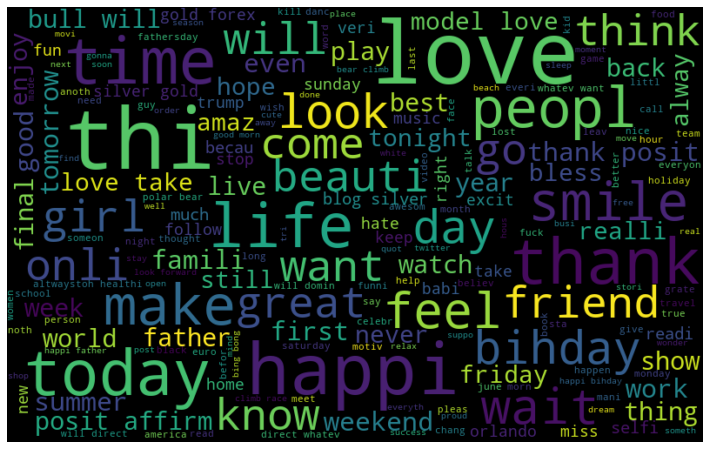

In [ ]:
all_words= " ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#  plot the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')

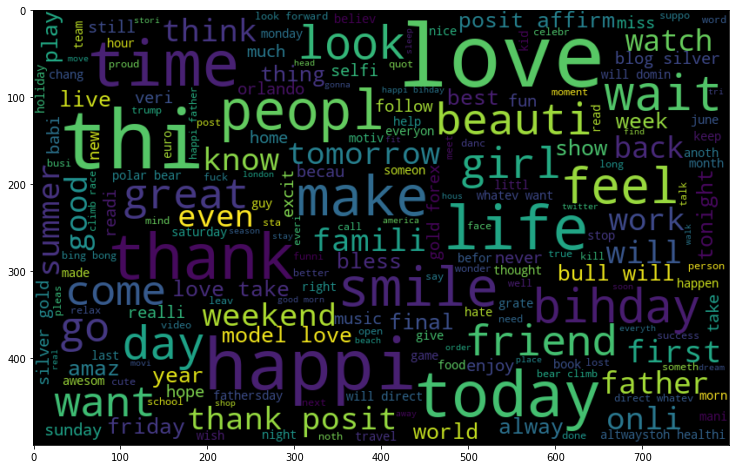

In [ ]:
# frequent words visualization for positive
all_words= " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#  plot the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')


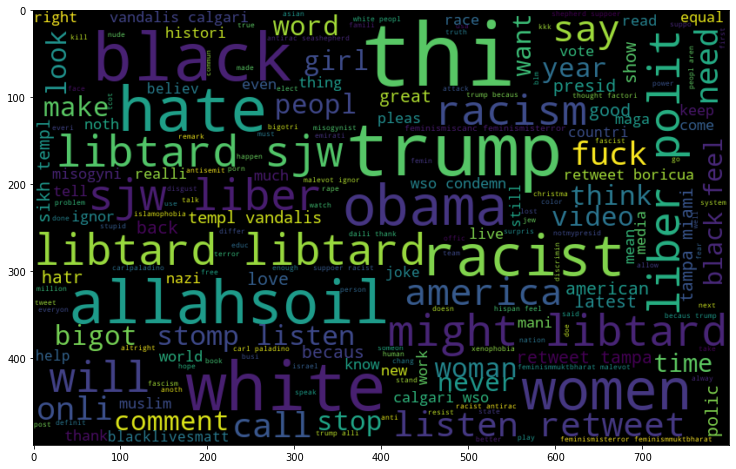

In [ ]:
# frequent words visualization for negative
all_words= " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#  plot the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
# extracting the hashtag
def hashtag_extract(tweet):
  hashtags=[]
  # Loop words in the tweet
  for tweet in tweet:
    ht=re.findall(r"#(\w+)",tweet)
    hashtags.append(ht)
  return hashtags


In [ ]:
# extract hashtags from non racist/sexist tweets
ht_positive= hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative= hashtag_extract(df['clean_tweet'][df['label']==1])

In [ ]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [ ]:
# unnest list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])


In [ ]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [ ]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


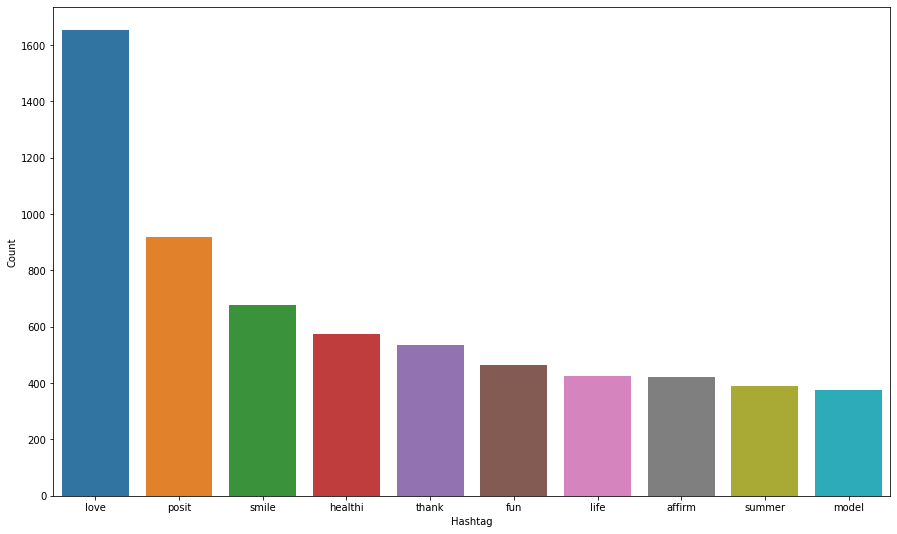

In [ ]:
# select top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')

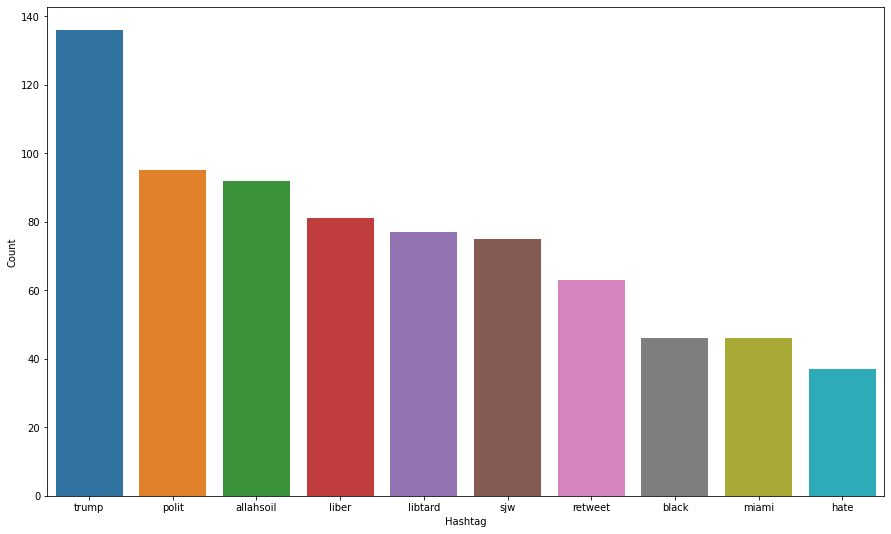

In [ ]:
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                'Count': list(freq.values())})
d.head()
# select top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')

# Input Split

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
# bow[0].toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(bow,df['label'],random_state=42, test_size=0.25)

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [ ]:
# training
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# testing
pred=model.predict(x_test)
f1_score(y_test,pred)


0.49763033175355453

In [ ]:
accuracy_score(y_test,pred)

0.9469403078463271

In [ ]:
# user probability to get output
pred_prob=model.predict_proba(x_test)
pred=pred_prob[:,1]>=0.3
pred=pred.astype(np.int)
f1_score(y_test,pred)

0.5545722713864307

In [ ]:
accuracy_score(y_test,pred)

0.9433112251282693